In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Part II: Analyzing Energy Use across Years

At this point, you have **visualized** the utility network as well as water flow from immediate sources. Now that you have a picture of what your water system looks like, we will dig into **energy analysis**. In particular, we will:
1. **Analyze** how energy use in your assigned utility changed from 2010 to 2015 (actual 2010 vs. actual 2015)
2. **Assess** how well energy use in 2015 was predicted back in 2010 (predicted 2015 vs. actual 2015)
3. **Aggregate** all utilities and look at the overall energy consumption trend in California

We will cover a majority of the content of this notebook in class, but discussion questions and analysis for your own utility is designed for you to do on your own. This will be a piece of cake if you follow along, so pay close attention!



## Importing Data

Our data is stored in a CSV file called `network.csv`. We learned how to read in a Table in the Introduction Notebook: let's do this here.


In [2]:
data = Table().read_table('network.csv')
data

year,source,target,cumulative_volume_af,transmission_kwh/af
2010,1801001PD,1801001E,1624,163.1
2010,1801007PD,1801007E,2015.2,163.1
2010,1801009PD,1801009E,2924.55,163.1
2010,1801011PD,1801011E,1350,163.1
2010,1801015PD,1801015E,840,163.1
2010,1801017PD,1801017E,1798.34,163.1
2010,1801019PD,1801019E,1414.56,163.1
2010,1801021NPD,1801021E,710,195.72
2010,1801021PD,1801021E,3098.08,163.1
2010,1801023NPD,1801023E,204,195.72



Here is a breakdown of what the columns mean:
<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

1. **`year`**: the year corresponding to the water transport and energy use measurement
    - 2010: actual data collected from the year 2010
    - 2015: actual data collected from the year 2015
    - Predicted 2015: predictions made in 2010 for 2015

2. **`source`**: shows where the water is transported _from_. Contains any water source that provides water to those target utilties.

3. **`target`**: shows the receiving utility from its source. Contains only water utilities. 

4. **`cumulative_volume_af`**: shows the total amount of volume transported from source and target (measured in acre-feet)

5. **`transmission_kwh/af`**: shows the amount of energy used during the transmission, where kWh/AF = kiloWatt-hours required to pump **one** acre-foot of water through the irrigation system. 
</div>
Note that each row contains information on water flow and energy use between a water source and its target (utility).

## Actual 2010 Data

Let's get the actual observed data in 2010. By setting the column of the data table as 2010, we will be looking at the actual 2010 data. 

Before we get started, let's remind ourselves how to use `.where()`

The **`where`** function allows us to choose certain rows based on two arguments:
- A column label
- A condition that each row should match, called the _predicate_ 

In other words, we call the `where` function like so: `table_name.where(column_name, predicate)`.

In [5]:
#Getting data for 2010.
#data_2010 = network.where('year',are.equal_to(2010))
data_2010 = data.where('year', are.equal_to('2010'))
data_2010

year,source,target,cumulative_volume_af,transmission_kwh/af
2010,1801001PD,1801001E,1624,163.1
2010,1801007PD,1801007E,2015.2,163.1
2010,1801009PD,1801009E,2924.55,163.1
2010,1801011PD,1801011E,1350,163.1
2010,1801015PD,1801015E,840,163.1
2010,1801017PD,1801017E,1798.34,163.1
2010,1801019PD,1801019E,1414.56,163.1
2010,1801021NPD,1801021E,710,195.72
2010,1801021PD,1801021E,3098.08,163.1
2010,1801023NPD,1801023E,204,195.72


## Let's try extracting data for a specific utility.
### This is an example for Cerritos (1807057E).
We will first get the 2010 data for Cerritos utility by setting the target column to be equal to the utility code.
##### Cerritos

In [6]:
#Actual 2010 data for Cerritos utility
cerritos_2010 = data_2010.where("target",are.equal_to("1807057E"))
cerritos_2010

year,source,target,cumulative_volume_af,transmission_kwh/af
2010,1807057NPD,1807057E,1870,195.72
2010,1807057PD,1807057E,6048,163.1


Notice that the target column is now set to the Cerritos utility in the year 2010. It is receiving water from two sources 1807057NPD and 1807057PD. The cumulative_volume_af column shows the total amount of water trasferred from each sources and transmission_kwh/af shows the amount of energy required to pump water in kwh per acre-foot of water through the irrigation system.

### Now similar to above, let's extract data for 2015! You can set the year column to equal to 2015.
## Actual 2015 Data
We will now get the actual 2015 data by finding the rows in data table where the year is equal to 2015.

In [7]:
#Getting data for 2015
data_2015 = data.where('year',are.equal_to('2015'))
data_2015

year,source,target,cumulative_volume_af,transmission_kwh/af
2015,1803007PD,1803007E,3145.61,17.6
2015,1803009PD,1803009E,55032,1284
2015,1803013PD,1803013E,688,2000
2015,1803015PD,1803015E,3952,17.6
2015,1803017PD,1803017E,24854,17.6
2015,1803019NPD,1803019E,2143,42.24
2015,1803019PD,1803019E,11704.7,35.2
2015,1803027PD,1803027E,4842.57,17.6
2015,1803029PD,1803029E,7502,35.2
2015,1803033NPD,1803033E,15022,84.48


## Extracting data in 2015 for Cerritos (1807057E)
Let's get the 2015 data for Cerritos utility by setting the target column to be equal to its utility code.

##### Cerritos

In [8]:
cerritos_2015 = data_2015.where("target", are.equal_to("1807057E"))
cerritos_2015

year,source,target,cumulative_volume_af,transmission_kwh/af
2015,1807057NPD,1807057E,2335,195.72
2015,1807057PD,1807057E,8460,326.2


Do you see anything different between 2010 and 2015 data for Cerritos utility? Notice that the cumulative_volume_af from 1807075PD source increased significantly, as well as the transmission_kwh/af value.  In the 2015 data table, you can notice that the maginitude of cumulative_volume_af from each sources increased compared to the 2010 table. Also notice how the transmission energy in kwh increased per acre foot of water irrigation. This increase in the magnitude will be our core focus throughout the lab as we look at the total energy and volume increased between the year 2010 and 2015. 

<i> Keep eye on on not just whether values increase or decrease, but also on <b> how much </b> it increases/decreases </i>

## Try your own!

### Find the 2010 data for your utility.

##### Utility

In [56]:
#Find the actual 2010 for your utility
utility = data.where("target",are.equal_to("YOUR UTILITY CODE"))
utility

## Try extracting 2015 data for your own utility!
Similar to what you did for the 2010 data, find where the target column is equal to your utility code.

##### Utility

In [58]:
#Data where target = YOUR UTILITY CODE
utility_2015 = ...
utility_2015

#### Question: Do you notice any difference in the magnitudes of volume or energy per acre foot in your data? Describe. 


In [1]:
TYPE YOUR ANSWER

Before we dive into calculation, let's look at <b>two</b> important methods we will be using.

The **`.column()`** function returns the values of a column as an array.:
- index or label

We call the `column()` function like so: `table_name.column(index_or_label)`.

In order to select two columns from a table, you can do `table_name.column(column1)` x `table_name.column(column2)` 

The **`.with_column()`** function returns a new table with an additional or replaced column.:
- A column label
- values

We call the `.with_column()` function like so: `table_name..with_column(label, values)`.

## Add a column that calculates total energy used in each utility.

For each data set, we have a column that tells us the cumulative volume of water transferred and energy required to pump water per acre foot through the irrigation system. By multiplying the two columns, we can get the total amount of energy used in pumping water from each source to a target. For example, if you look at the cerritos data from 2010, we pumped 6048 units of water with 163.1 kwh/af energy used to transfer. We will now multiply these two numbers to get the total energy used from this utility: 986429.8 kwh.


### How to calculate the amount of energy used.

- transmission_kwh = cumulative_volume_af * transmission_kwh/af

In [16]:
total_energy_2010 = cerritos_2010.column('cumulative_volume_af') * cerritos_2010.column('transmission_kwh/af')
total_energy_2015 = cerritos_2015.column('cumulative_volume_af') * cerritos_2015.column('transmission_kwh/af')

#### Cerritos 2010

In [13]:
cerritos_2010 = cerritos_2010.with_column('total energy in kwh', total_energy_2010)
cerritos_2010

year,source,target,cumulative_volume_af,transmission_kwh/af,total energy in kwh
2010,1807057NPD,1807057E,1870,195.72,365996
2010,1807057PD,1807057E,6048,163.1,986429


##### Cerritos 2015

In [14]:
cerritos_2015 = cerritos_2015.with_column('total energy in kwh', total_energy_2015)
cerritos_2015

year,source,target,cumulative_volume_af,transmission_kwh/af,total energy in kwh
2015,1807057NPD,1807057E,2335,195.72,457006
2015,1807057PD,1807057E,8460,326.2,2.75965e+06


# Try your own!
As shown in the examples above, you will be using `.with_column()` method to calculate the total energy used in the irrigation process for the utility and adding it to the data table.

First, multiply the cumulative_volume_af column and transmission_kwh/af colum in each 2010 and 2015 data table.
Then, insert these values into the appropriate data table.

In [ ]:
totalenergy_2010 = ...
totalenergy_2015 = ...

#### Utility 2010

In [2]:
#actual 2010 data with total energy column
utility_2010 = utility_2010.with_column('total energy in kwh',...)
utility_2010

#### Utility 2015

In [ ]:
#actual 2015 data with total energy column
utility_2015 = utility_2010.with_column('total energy in kwh',...)
utility_2015

# Further Analysis

Now we will be comparing change of volume of water between actual 2010 data vs actual 2015 data and actual 2015 data vs predicted 2015 data. By using the bargraphs, we will also visualize represent the data and analyze the difference between these observations.

Before jumping into analysis, let's get all the data tables we need for our analysis. We will be looking at the actual 2010 data, predicted 2015 data (from 2010), and actual 2015 data.



#### Actual 2010 Data

In [23]:
cerritos_2010 

year,source,target,cumulative_volume_af,transmission_kwh/af,total energy in kwh
2010,1807057NPD,1807057E,1870,195.72,365996
2010,1807057PD,1807057E,6048,163.1,986429


#### Actual 2015 Data

In [24]:
cerritos_2015

year,source,target,cumulative_volume_af,transmission_kwh/af,total energy in kwh
2015,1807057NPD,1807057E,2335,195.72,457006
2015,1807057PD,1807057E,8460,326.2,2.75965e+06


By setting the year column from original data table to equal to Predicted 2015, we can get the data where 2015 data were predicted in the year 2010.

#### Predicted 2015 Data

In [18]:
#Simply run this cell

data_2010_pred = data.where('year', are.equal_to('Predicted 2015'))
cerritos_2015p = data_2010_pred.where("target",are.equal_to("1807057E"))
cerritos_2015p

#add the total energy column
cerritos_2015p = cerritos_2015p.with_column('total energy in kwh', cerritos_2015p.column('cumulative_volume_af') * cerritos_2015p.column('transmission_kwh/af'))
cerritos_2015p

year,source,target,cumulative_volume_af,transmission_kwh/af,total energy in kwh
Predicted 2015,1807057NPD,1807057E,2046,195.72,400443
Predicted 2015,1807057PD,1807057E,7410,163.1,1.20857e+06


## Total Amount of Energy.
Let's calculate the total amount of energy used in each table. You can calculate by adding the total energy column!
We will be using the `.sum()` method. First get the column by `.column()` and then use `.sum()`.


#### What is the total amount of energy used in 2010?
By adding all the values in the total energy column in cerritos_2010 table, we can get the total amount of energy used in 2010 at cerritos utility.
In order to do this we can use the `.sum()` function where you first select the column in the table by `.column` method, which returns an array of values in that column, and apply `.sum()` function that adds up all the values.

In [23]:
actual_energy_2010 = cerritos_2010.column('total energy in kwh').sum()
actual_energy_2010

1352425.2

#### What is the total amount of energy used in 2015?

In [24]:
actual_energy_2015 = cerritos_2015.column("total energy in kwh").sum()
actual_energy_2015

3216658.2000000002

#### What is the total amount of energy predicted to be used in 2015?

In [19]:
predicted_energy_2015 = cerritos_2015p.column("total energy in kwh").sum()
predicted_energy_2015

1609014.1200000001

## Percent Increase of Energy

#### What is the percent increase of energy used between 2010 and 2015?
By subtracting the total amount of energy used between 2015 and 2010, divide by the total amount of energy in 2010, then multiply by 100, we can get the percentage increase in total amount of energy between 2010 and 2015.

In [40]:
increase = actual_energy_2015 - actual_energy_2010
percentage_inc = increase / actual_energy_2010 * 100
print(str(percentage_inc) + "%")

137.843704776%


WOW! notice how much total energy increased between 2010 and 2015! We can see that the total amount energy increased by about 137.8% between 2010 and 2015. What do you think caused this significant increase? 

### Total Volume Transported
Let's calculate the total volume transported to the target utility each year.
For each table, we can select the cumulative_vol_af column in each data set and add the values to get the total amount of volume transferred to the target source each year.

#### What is the total amount of water transported in 2010?

In [27]:
volume_2010 = cerritos_2010.column("cumulative_volume_af").sum()
volume_2010

7918.0

#### What is the total amount of water transported in 2015?

In [28]:
volume_2015 = cerritos_2015.column("cumulative_volume_af").sum()
volume_2015

10795.0

#### What is the total amount of water predicted to be transported in 2015?

In [29]:
volume_2015p = cerritos_2015p.column("cumulative_volume_af").sum()
volume_2015p

9456.0

## Percent Increase of Total Energy

Let's look at how much energy increased between year 2010 and 2015!


#### What is the percent increase of energy used between 2010 and 2015?
By subtracting the total amount of energy used between 2015 and 2010, divide by the total amount of energy in 2010, then multiply by 100, we can get the percentage increase in total amount of energy between 2010 and 2015.

In [30]:
increase = actual_energy_2015 - actual_energy_2010
percentage_inc = increase / actual_energy_2010 * 100
print(str(percentage_inc) + "%")

137.843704776%


WOW! notice how much total energy increased between 2010 and 2015! We can see that the total amount energy increased by about 137.8% between 2010 and 2015. What do you think caused this significant increase? 

## Percent Increase of Volume

Let's look at how much total volume increased between year 2010 and 2015!

#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [127]:
difference = volume_2015 - volume_2010
percentage_diff = difference / volume_2010 * 100
print (str(percentage_diff) + "%")

36.3349330639%


Not as much as the total energy, but the total volume of water also increased about 36.3% between 2010 and 2015.

#### Question: 
What actually happened in amount of energy and water used in water irrigation to the utility between 2010 and 2015? How is it different from what was expected in 2010? What do you think caused this change?

TYPE YOUR ANSWER

## Visualizing Differences </div>

It's difficult to effectively compare all of these numbers separately. Let's make a **barplot** here to visualize the magnitude of these differences! In particular, we want to understand how energy use in 2015 compares to energy use in 2010 *as well as* how much energy was predicted to be used in 2015.</div>

The code block below creates this bar plot. Don't worry too much about how the plot is made: for now, simply run the cell. </div>

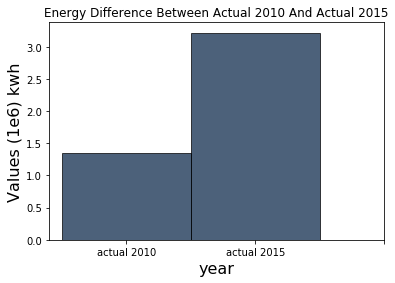

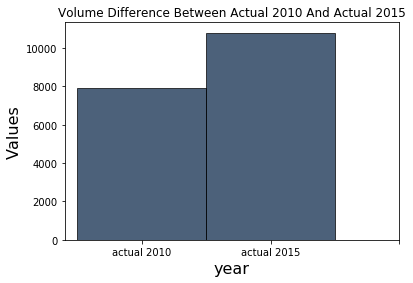

In [39]:
#graph showing total amount of energy used in actual 2010, predicted 2015, and actual 2015
energy_comb = Table().with_columns('year', np.array(['actual 2010','actual 2015']),
                   'values', np.array([actual_energy_2010/(10**6),actual_energy_2015/(10**6)]))
energy_bar = energy_comb.bar('year')
plt.title("Energy Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values (1e6) kwh');
plt.xticks(np.arange(3),['actual 2010','actual 2015'],rotation=0)
energy_bar;

#graph showing total amount of water transported in actual 2010, predicted 2015, and actual 2015
volume_comb = Table().with_columns('year', np.array(['actual 2010','actual 2015']),
                   'values', np.array([volume_2010, volume_2015]))
volume_bar = volume_comb.bar('year')
plt.title("Volume Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values');
plt.xticks(np.arange(3),['actual 2010', 'actual 2015'],rotation=0)
volume_bar;

In the two bar graphs plotted above, we can see that in 2015, the actual energy used was significantly higher than the predicted 2015 total energy. The total amount of volume in actual 2015 was also higher than predicted 2015 value, but it was not as significant as the total amount of energy. From these two graphs, we can analyze that because of the drought, in year 2015, Cerritos utility needed more amount of water than they expected in 2015. Consequently, they transported amount of water from the sources and this unexpected transportation energy caused high increase in transportation energy during the irrigation process.

## Discussion Questions

##### What do you think caused a significant increase in usage of energy and volume of water between 2010 and 2015?

TYPE YOUR ANSWER

##### What are the differences you can find between actual 2015 data and predicted 2015 data?

TYPE YOUR ANSWER

##### Can you connect information found through the energy flow chart and the analysis done with Cerritos Water Utility?

TYPE YOUR ANSWER

# Your Turn!

### Let's try to analyze your own utility!

To make the process easier, let's reload the data tables for your own utility in actual 2010, predicted 2015 and actual 2015 that you found above!

In [ ]:
utility_2010

In [ ]:
utility_2015

Similar to what you did above, in order to extract the predicted 2015 data table, first choose set the year column in original data table to equal to predicted 2015. Then set the target column to the utility code to get the predicted 2015 table for your own utility. Finally, add the total energy column by multiplying the cumulative_vol_af colume and transmission_kwh/af colume.

In [ ]:
data_2015_pred = data.where('year', are.equal_to('Predicted 2015'))
utility_2015p = data_2015_pred.where(...)
utility_2015p

#add the total energy column
cerritos_2015p = utility_2015p.with_column(...)
cerritos_2015p

## Total Amount of Energy.

#### What is the total amount of energy used in 2010?

In [ ]:
energy_2010 = ...
energy_2010

#### What is the total amount of energy used in 2015?

In [ ]:
energy_2015 = ...
energy_2015

#### What is the total amount of energy predicted to be used in 2015?

In [ ]:
energy_2015p = ...
energy_2015p

### Total Volume Transported

#### What is the total amount of water transported in 2010?

In [ ]:
volume_2010_utility = ...
volume_2010_utility

#### What is the total amount of water transported in 2015?

In [ ]:
volume_2015_utility = ...
volume_2015_utility

#### What is the total amount of water predicted to be transported in 2015?

In [ ]:
volume_2015p_utility = ...
volume_2015p_utility

## Percent Increase of Total Energy

Let's look at how much energy increased between year 2010 and 2015!

#### What is the percent increase of energy used between 2010 and 2015?

In [ ]:
increase = ...
percentage_inc = ...
percentage_inc

In [ ]:
TYPE YOUR ANSWER

## Percent Increase of Volume

Let's look at how much total volume increased between year 2010 and 2015!

#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
decrease = ...
percentage_dec = ...
percentage_dec

#### Question:
What actually happened in change of energy and water volume between 2010 and 2015? How is it different from the prediction?

TYPE YOUR ANSWER

# Visualization
Can you create visualization for difference in energy and water volume for your utility to show how the prediction for 2015 from actual 2015 data?
Fill in the `...` next to `energy_bar1` and `volume_bar1` to create a bar graph for the table that is created from the values that you have calculated above!

### Graph for the energy differences

In [ ]:
#graph showing total amount of energy used in actual 2010, predicted 2015, and actual 2015
energy_comb1 = Table().with_columns('year', np.array(['actual 2010', 'actual 2015']),
                   'values', np.array([energy_2010/(10**6),energy_2015/(10**6)]))
energy_bar1 = ...
plt.title("Energy Difference Between Actual 2010 And Actual 2015")
plt.ylabel('Values (1e6) kwh');
plt.xticks(np.arange(3),['actual 2010','actual 2015'],rotation=0)
energy_bar;

#graph showing total amount of water transported in actual 2010, predicted 2015, and actual 2015
volume_comb1 = Table().with_columns('year', np.array(['actual 2010','actual 2015']),
                   'values', np.array([volume_2010_utility, volume_2015_utility]))
volume_bar1 = ...
plt.title("Volume Difference Between Actual 2010And Actual 2015")
plt.ylabel('Values');
plt.xticks(np.arange(3),['actual 2010','actual 2015'],rotation=0)
volume_bar;

# Big Data: All the Utilities in the United States

We have created a new table called test which contains both 2010 and 2015 data for all the utilities in the United States. From this data we will find a ratio between the total amount of energy consumed and the total amount of water trasnported to see the relationship between energy and water among actual 2010, actual 2015, and predicted 2015 data.

In [25]:
#import the table which has 2010 and 2015 data
test = Table().read_table('network.csv')

#multiply the cumulative_volume_af column and transmission_kwh/af column to calculate the total energy
test = test.with_column('Total Energy', test.column('cumulative_volume_af')*test.column("transmission_kwh/af"))

#Group by the year column to collect cumulative data for actual 2010, actual 2015, and predicted 2015 data.
test_group = test.group('year', sum)
test_group

year,data_year sum,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,treatment_kwh/af sum,used_vol_af sum,Total Energy sum
2010,1041180,,,6.64069e+06,87234.8,0,6.53952e+06,1.10632e+09
2015,745550,,,4.3739e+06,162506,0,4.3739e+06,2.70958e+09
Predicted 2015,1115550,,,8.03714e+06,94854.8,0,7.93035e+06,1.33226e+09


Divide the Total Energy sum column by the transmission_kwh/af sum column to calculate the ratio between energy and water.



In [26]:
#Ratio
ratios = test_group.column('Total Energy sum') / test_group.column('cumulative_volume_af sum')
test_group = test_group.with_column('energy per volume', ratios)
test_group

year,data_year sum,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,treatment_kwh/af sum,used_vol_af sum,Total Energy sum,energy per volume
2010,1041180,,,6.64069e+06,87234.8,0,6.53952e+06,1.10632e+09,166.598
2015,745550,,,4.3739e+06,162506,0,4.3739e+06,2.70958e+09,619.489
Predicted 2015,1115550,,,8.03714e+06,94854.8,0,7.93035e+06,1.33226e+09,165.763


From the ratio found by dividing total amount of energy used by the total volume of water, we can see that the ratio was significantly higher for 2015. In 2010, California consumed 1.10632 Billion kwh (kilowatt per hour) of energy to transport 6.64069 Million (units) of water. The amount of water transported in 2015 was predicted at that time to increase, so the total energy consumed was also predicted to increase by a small amount. However, the data shows that in 2015, the amount of water transported actually reduced to 4.3739 Million (units) of water, but the total energy expended increased significantly to 2.70958 Billion kwh, which is much higher than the predicted increase in energy (which also predicted that water transports would increase).

#### How did this happen? What do you think caused this change? 



TYPE YOUR ANSWER

#### How does the cumulative data compare to your own utility? Did your utility have a similar trend as the cumulative data?

TYPE YOUR ANSWER

# DONE
You are now done! 